In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

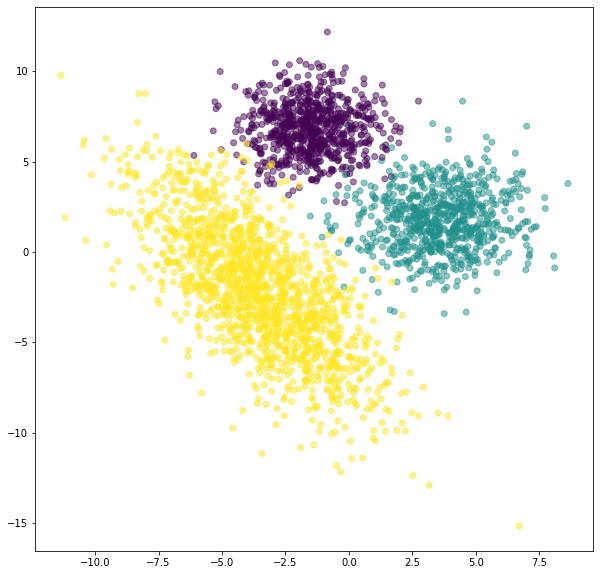

In [3]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

In [4]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.preprocessing import StandardScaler

In [5]:
Xs = StandardScaler().fit_transform(X)

In [6]:
# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(Xs)
# теперь посчитаем однородность
print(homogeneity_score(labels_true=y, labels_pred=kmeans.labels_))
print(completeness_score(labels_true=y, labels_pred=kmeans.labels_))
print(v_measure_score(labels_true=y, labels_pred=kmeans.labels_))

0.804474693112785
0.7828224102025245
0.793500872513578


In [7]:
gm = GaussianMixture(n_components=3, random_state=42)
gm_pred = gm.fit_predict(Xs)
print(homogeneity_score(labels_true=y, labels_pred=gm_pred))
print(completeness_score(labels_true=y, labels_pred=gm_pred))
print(v_measure_score(labels_true=y, labels_pred=gm_pred))

0.9339791347507893
0.9325740421656737
0.9332760595996924


In [8]:
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(Xs)
print(homogeneity_score(labels_true=y, labels_pred=ac.labels_))
print(completeness_score(labels_true=y, labels_pred=ac.labels_))
print(v_measure_score(labels_true=y, labels_pred=ac.labels_))

0.9099781767383747
0.9058386997451113
0.9079037199053294


In [9]:
dbscan = DBSCAN(eps=0.9, min_samples=35)
dbscan.fit(X)
print(homogeneity_score(labels_true=y, labels_pred=dbscan.labels_))
print(completeness_score(labels_true=y, labels_pred=dbscan.labels_))
print(v_measure_score(labels_true=y, labels_pred=dbscan.labels_))

0.8689356473867522
0.6965554058940557
0.7732549110297919


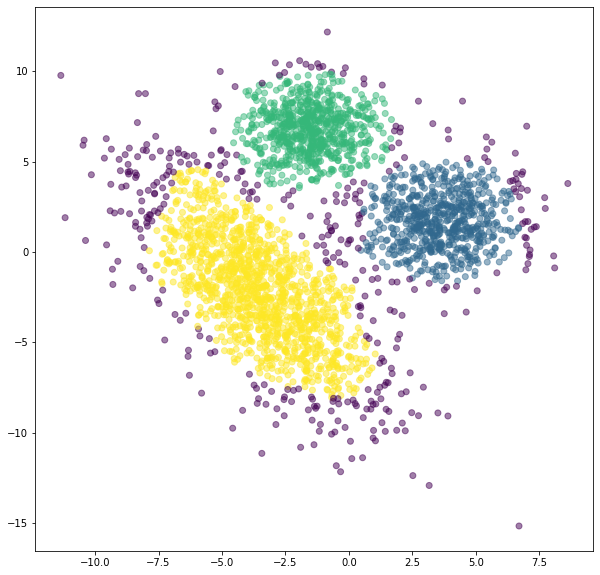

In [10]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, alpha=0.5)
plt.show()

Задание 4.14.3

In [11]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=1, random_state=42)
kmeans.fit(Xs)
print(v_measure_score(labels_true=y, labels_pred=kmeans.labels_))

kmeans = KMeans(n_clusters=3, init='random', n_init=1, random_state=42)
kmeans.fit(Xs)
print(v_measure_score(labels_true=y, labels_pred=kmeans.labels_))

0.7892280957870129
0.7892280957870129


Задание 4.14.4

In [12]:
from sklearn.cluster import MiniBatchKMeans

In [14]:
kmeans_mini_batch = MiniBatchKMeans(n_clusters=3, n_init=1, random_state=42)
kmeans_mini_batch.fit(X)
print(v_measure_score(labels_true=y, labels_pred=kmeans_mini_batch.labels_))

0.7802036540872134


4.14.6

In [15]:
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X)
print(v_measure_score(labels_true=y, labels_pred=ac.labels_))

ac = AgglomerativeClustering(n_clusters=3)
ac.fit(Xs)
print(v_measure_score(labels_true=y, labels_pred=ac.labels_))

ac = AgglomerativeClustering(n_clusters=3, connectivity=connectivity)
ac.fit(X)
print(v_measure_score(labels_true=y, labels_pred=ac.labels_))

ac = AgglomerativeClustering(n_clusters=3, connectivity=connectivity)
ac.fit(Xs)
print(v_measure_score(labels_true=y, labels_pred=ac.labels_))

0.703747024360433
0.9079037199053294
0.902634398342219
0.883942992495597
